## Tahap 1: Pemahaman Masalah & Problem Statement

### Problem Statement

In [46]:
# Prediksi Nilai Transaksi
## - Bagaimana cara memprediksi Total Price berdasarkan kategori, subkategori, aksi user, dan informasi lain yang tersedia?
## - Model prediktif ini akan membantu memperkirakan potensi revenue dari interaksi user.
# Faktor yang Mempengaruhi Nilai Transaksi
## - Fitur apa saja yang paling memengaruhi Total Price?
## - Seberapa besar kontribusi masing-masing faktor?

### Tujuan Proyek

In [47]:
# - Mengembangkan model prediksi Total Price yang akurat dan andal.
# - Mengidentifikasi faktor-faktor penting yang berpengaruh terhadap Total Price.
# - Memberikan rekomendasi bisnis berdasarkan hasil analisis, misalnya strategi upselling, fokus kategori tertentu, atau peningkatan customer engagement di aksi tertentu (add_to_cart → purchase).

## Tahap 2: Data Preprocessing

In [48]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("/content/final_customer_data.xlsx")
print("Data: ", df.head())

Data:         User_id             Session_id             DateTime  \
0  52243841613  d76fde-8bb3-4e00-8c23  2019-01-10 10:20:00   
1  52243841613  33dfbd-b87a-4708-9857  2019-01-10 10:22:00   
2  57314161118  6511c2-e2e3-422b-b695  2019-01-10 14:00:00   
3  57314161118  90fc70-0e80-4590-96f3  2019-01-10 14:07:00   
4  57314161118  bd7419-2748-4c56-95b4  2019-01-10 14:12:00   

                Category SubCategory          Action  Quantity  Rate  \
0  Electronic Appliances    Speakers  first_app_open       NaN   NaN   
1  Electronic Appliances    Speakers          search       NaN   NaN   
2          Men's Fashion       Jeans          search       NaN   NaN   
3          Men's Fashion       Jeans    product_view       NaN   NaN   
4          Men's Fashion       Jeans    read_reviews       NaN   NaN   

   Total Price  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


### Struktur Data

In [49]:
print("Ukuran Dataset: ",df.shape)


Ukuran Dataset:  (2090, 9)


In [50]:
print("Informasi Dataset: ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_id      2090 non-null   int64  
 1   Session_id   2090 non-null   object 
 2   DateTime     2090 non-null   object 
 3   Category     2090 non-null   object 
 4   SubCategory  2090 non-null   object 
 5   Action       2090 non-null   object 
 6   Quantity     201 non-null    float64
 7   Rate         201 non-null    float64
 8   Total Price  201 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 147.1+ KB
Informasi Dataset:  None


In [51]:
print("Statistik Deskriptif: ", df.describe())

Statistik Deskriptif:              User_id    Quantity          Rate    Total Price
count  2.090000e+03  201.000000    201.000000     201.000000
mean   5.383871e+10    2.965174   7133.283582    9455.373134
std    2.781474e+09    7.161968  14778.150668   18213.695424
min    5.144382e+10    1.000000     10.000000     150.000000
25%    5.176871e+10    1.000000    500.000000    1000.000000
50%    5.220572e+10    2.000000   1200.000000    2500.000000
75%    5.566042e+10    3.000000   6000.000000    8000.000000
max    6.030264e+10  100.000000  90000.000000  160000.000000


### Pembersihan Data

#### Missing Value

In [52]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 User_id           0
Session_id        0
DateTime          0
Category          0
SubCategory       0
Action            0
Quantity       1889
Rate           1889
Total Price    1889
dtype: int64


In [53]:
# Isi missing values
for col in ['Quantity', 'Rate', 'Total Price']:
    df[col] = df[col].fillna(df[col].median())
for col in ['Category', 'SubCategory', 'Action']:
    df[col] = df[col].fillna(df[col].mode()[0])

#### Data Duplikat

In [54]:
# Hapus duplikat
df = df.drop_duplicates()

### Transformasi Data

In [55]:
# Ubah DateTime ke format datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding kategorikal
le = LabelEncoder()
for col in ['Category','SubCategory','Action']:
    df[col] = le.fit_transform(df[col])

In [57]:
# Buang ID
df = df.drop(['User_id','Session_id'], axis=1)

In [58]:
# Feature engineering dari DateTime
df['hour'] = df['DateTime'].dt.hour.fillna(0).astype(int)
df['dayofweek'] = df['DateTime'].dt.dayofweek.fillna(0).astype(int)
df['month'] = df['DateTime'].dt.month.fillna(0).astype(int)

In [59]:
df = df.drop(columns=['DateTime'])

In [60]:
# Split fitur dan target
X = df.drop(columns=['Total Price'])
y = df['Total Price']

In [61]:
# Standarisasi numerik
scaler = StandardScaler()
num_cols = ['Quantity','Rate','hour','dayofweek','month']
X[num_cols] = scaler.fit_transform(X[num_cols])

Interpretasi:
- Missing values diisi median data.
- Variabel kategorikal (Category, SubCategory, Action) di-encode.
- Variabel waktu dipecah menjadi jam, hari dan bulan.
- Dataset bersih & siap modeling.

## Tahap 3: Pengembangan Model

### Pembagian Dataset

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Pemilihan Model

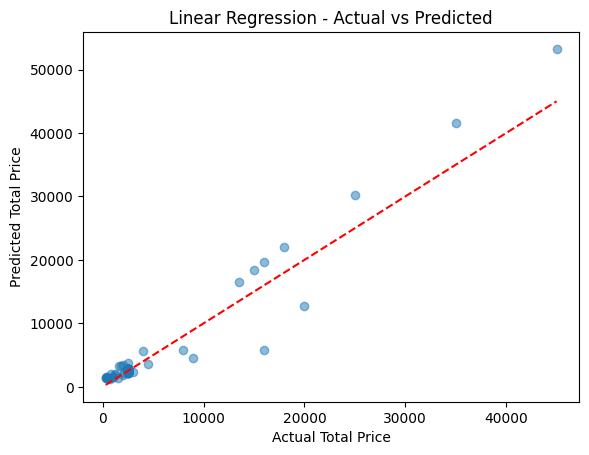

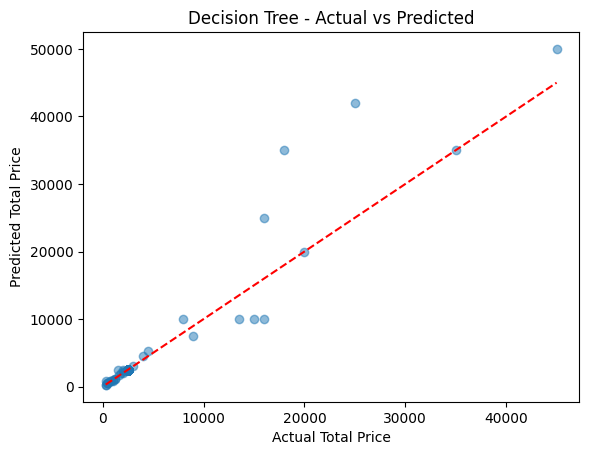

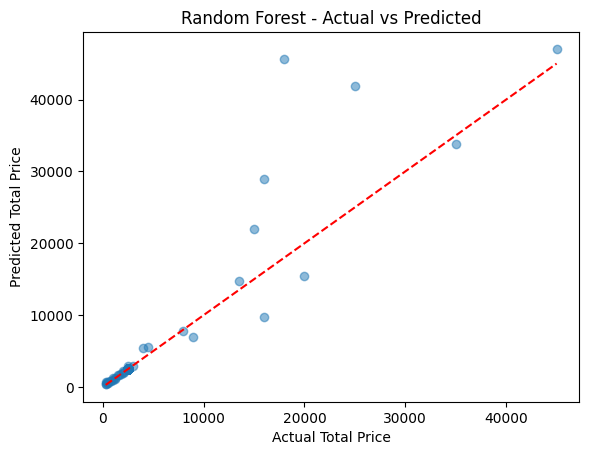

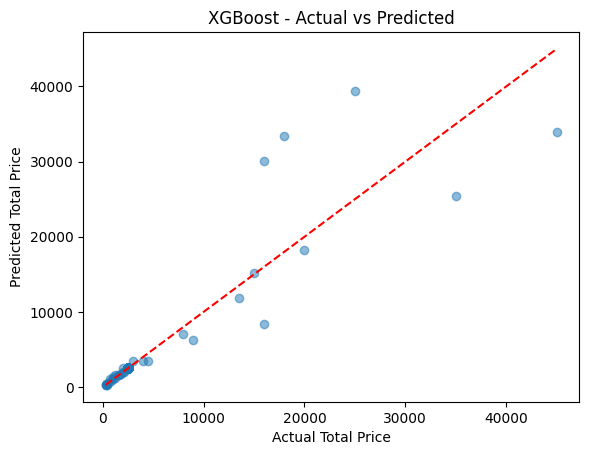

                          MAE         RMSE        R²
Linear Regression  291.779267   979.012286  0.913087
Decision Tree      168.660287  1353.738400  0.833820
Random Forest      209.718182  1793.303088  0.708380
XGBoost            199.914956  1492.663319  0.797962


In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    # Calculate RMSE by taking the square root of MSE
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": np.sqrt(rmse), "R²": r2}

    # Plot prediksi vs actual
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Total Price")
    plt.ylabel("Predicted Total Price")
    plt.title(f"{name} - Actual vs Predicted")
    plt.show()

results_df = pd.DataFrame(results).T
print(results_df)

Interpretasi:
- Visualisasi Actual vs Predicted
  - Linier Regression
    - Pola titik lebih menyebar merata di sekitar garis merah. Model cenderung underpredict nilai tinggi juga, tetapi secara keseluruhan titik-titik lebih “mengikuti” garis merah dibanding Decision Tree.
  - Desion Tree
    - Banyak titik menumpuk di bawah garis merah pada nilai tinggi artinya prediksi Decision Tree cenderung underpredict (terutama untuk harga tinggi). Namun pada harga rendah, model cukup tepat (titik-titik dekat garis merah).
  - Random Forest
    - Banyak titik jauh di atas garis merah di nilai actual yang besar artinya model cenderung overestimate pada harga besar.
  - XGBoost
    - sebaran lebih mendekati garis merah, walau ada beberapa outlier → lebih stabil dibanding Random Forest pada harga besar.
- Tabel Metrik
  - Linear Regression punya R² tertinggi (0.913) artinya model ini paling baik menjelaskan variasi total price.
  - Decision Tree punya MAE terendah (168) artinya prediksinya rata-rata paling dekat dengan aktual, meskipun R² lebih rendah.
  - Random Forest justru performa terburuk di sini (R²=0.708, RMSE paling tinggi) artinya kemungkinan model overfit atau kurang optimal di hyperparameter-nya.
  - XGBoost lebih baik daripada Random Forest di RMSE dan R².

## Tahap 4: Optimasi Model

### Hyperparameter tuning Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Hyperparameter tuning Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid, cv=5, scoring='r2', n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Best params RF:", grid_rf.best_params_)
print("Best CV score RF:", grid_rf.best_score_)

Best params RF: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score RF: 0.8891696730807774


### Validasi Silang

In [69]:
# Validasi silang pada model terbaik
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(grid_rf.best_estimator_, X, y, cv=kf, scoring='r2')
print("Cross-val R² mean:", np.mean(cv_scores))

Cross-val R² mean: 0.8211788408582393


Interpretasi:
- Nilai R² = 0.889 pada fold terbaik menunjukkan model Random Forest bisa menjelaskan sekitar 88,9 % variansi target pada data validasi di fold itu.
- Nilai rata-rata R² = 0.821 menunjukkan bahwa, secara keseluruhan, pada data yang belum dilihat model, Random Forest mampu menjelaskan sekitar 82,1 % variansi target.
- Adanya selisih antara nilai terbaik dan nilai rata-rata menunjukkan performa model cukup stabil, karena tidak turun drastis di fold lain.

/tmp/ipython-input-2709805858.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")


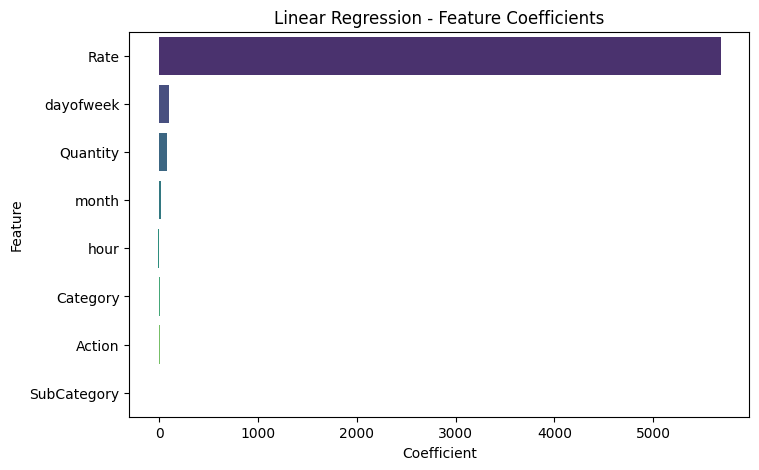

Koefisien Linear Regression:
       Feature  Coefficient
4         Rate  5689.890312
6    dayofweek    98.872539
3     Quantity    79.796558
7        month    21.075085
5         hour   -17.648295
0     Category     2.797669
2       Action     2.550825
1  SubCategory     0.240803


In [74]:
# Faktor yang paling berpengaruh
## Linear Regression Coefficients
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")
plt.title("Linear Regression - Feature Coefficients")
plt.show()

print("Koefisien Linear Regression:")
print(coef_df)

/tmp/ipython-input-203154924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="mako")


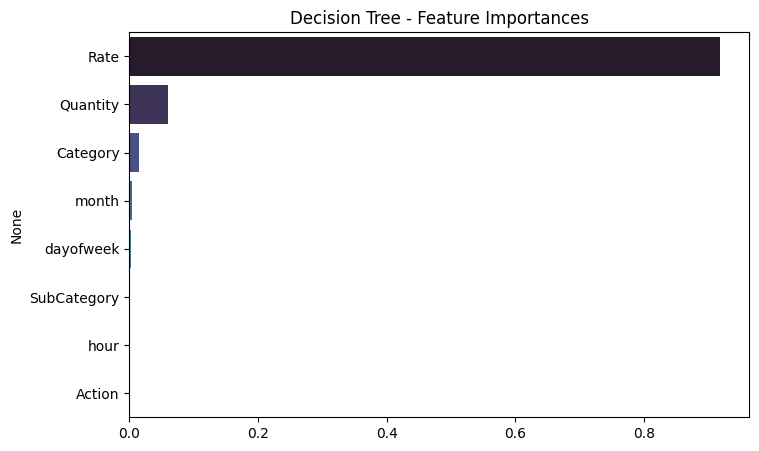

/tmp/ipython-input-203154924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="mako")


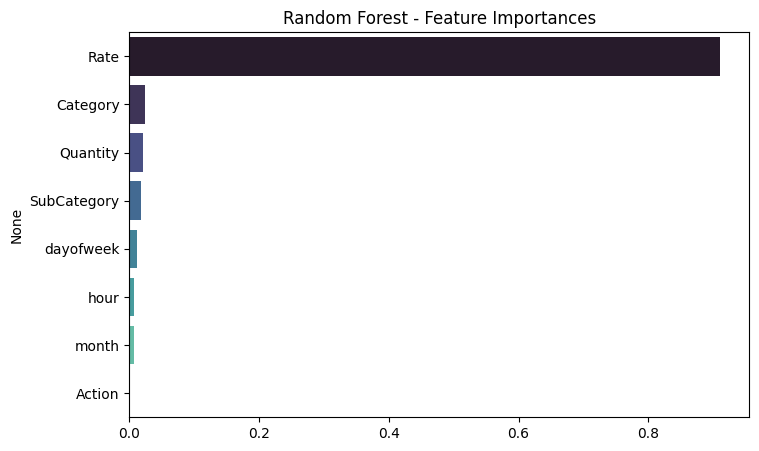

/tmp/ipython-input-203154924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="mako")


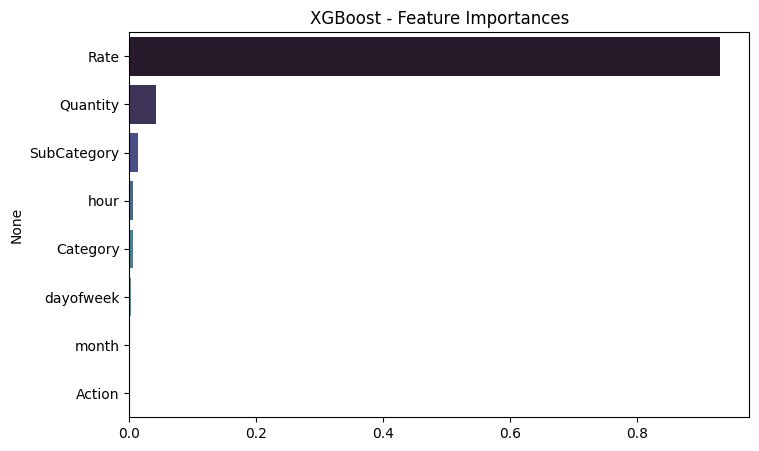

Decision Tree Feature Importances:
       Feature    Importance
0         Rate  9.176693e-01
1     Quantity  5.992143e-02
2     Category  1.493181e-02
3        month  3.905989e-03
4    dayofweek  2.056982e-03
5  SubCategory  1.174359e-03
6         hour  3.400892e-04
7       Action  7.093039e-08

Random Forest Feature Importances:
       Feature    Importance
0         Rate  9.104169e-01
1     Category  2.371304e-02
2     Quantity  2.168164e-02
3  SubCategory  1.743674e-02
4    dayofweek  1.228575e-02
5         hour  7.684038e-03
6        month  6.781827e-03
7       Action  4.882905e-08

XGBoost Feature Importances:
       Feature  Importance
0         Rate    0.930733
1     Quantity    0.041901
2  SubCategory    0.013476
3         hour    0.005070
4     Category    0.004923
5    dayofweek    0.002644
6        month    0.001251
7       Action    0.000001


In [72]:
## Feature Importances dari Tree-based Models
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,5))
    sns.barplot(x=importances[indices], y=X.columns[indices], palette="mako")
    plt.title(f"{model_name} - Feature Importances")
    plt.show()

    return pd.DataFrame({
        "Feature": X.columns[indices],
        "Importance": importances[indices]
    })

# Train tree-based models
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42, n_jobs=-1).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42, verbosity=0).fit(X_train, y_train)

# Plot feature importances
fi_dt = plot_feature_importance(dt, "Decision Tree")
fi_rf = plot_feature_importance(rf, "Random Forest")
fi_xgb = plot_feature_importance(xgb, "XGBoost")

print("Decision Tree Feature Importances:")
print(fi_dt)
print("\nRandom Forest Feature Importances:")
print(fi_rf)
print("\nXGBoost Feature Importances:")
print(fi_xgb)

Interpretasi:
- Linear Regression coefficients + feature importances tree-based menunjukkan fitur seperti:
  - Rate (harga per unit),
  - Quantity,
  - Kategori & Subkategori,
  - serta aksi user tertentu (misalnya add_to_cart → purchase) merupakan faktor dominan memengaruhi Total Price.

# Kesimpulan
- Linear Regression tetap yang paling baik menjelaskan variansi target di data ini (R² ~0.91).
- Random Forest setelah tuning mendekati performa baik (R² mean CV ~0.82) tapi masih di bawah Linear Regression.
- Decision Tree lebih tepat untuk prediksi sederhana dengan kesalahan rata-rata kecil, tapi kurang baik menjelaskan variansi.
- XGBoost cukup stabil di nilai tinggi, jadi bisa jadi alternatif selain RF.

# Saran & Rekomendasi Bisnis
1. Fokus pada Variabel yang Paling Berpengaruh
    - Rate (harga per unit) dan Quantity adalah faktor terbesar pembentuk Total Price. Artinya, dorong strategi upselling / bundling (contoh: tawarkan diskon untuk pembelian >1 unit agar quantity naik).
    - Kategori & Subkategori tertentu menghasilkan transaksi lebih tinggi. Artinya, prioritas stok, promosi, dan kampanye marketing pada kategori/subkategori yang rata-rata transaksinya besar.
2. Segmentasi Pelanggan untuk Penawaran Tepat Sasaran
   - Gunakan prediksi Total Price untuk mengelompokkan user dengan potensi belanja tinggi vs rendah. Artinya, tawarkan loyalty rewards, diskon premium, atau cross-selling khusus user bernilai tinggi.
3. Pengendalian Harga & Promosi
   - Karena Rate berpengaruh kuat, penetapan harga yang tepat bisa langsung mempengaruhi revenue. Artinya, lakukan price testing / dynamic pricing di kategori utama untuk melihat sensitivitas harga.
4. Prioritaskan Sumber Daya Marketing
   - Dengan model prediksi ini, tim marketing bisa memfokuskan budget pada interaksi dan kategori dengan prediksi Total Price tinggi.
   - Campaign lebih efisien karena diarahkan ke user dengan potensi revenue besar.